### CSE-221710313005-Akhila shankar

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

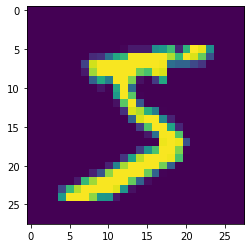

In [6]:
plt.imshow(train_digits[0])

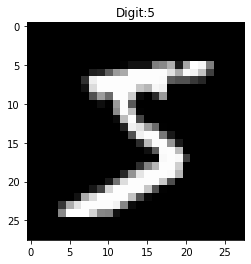

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

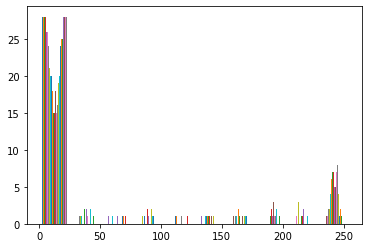

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([11126,   111,  4855, 52093, 19137, 55571, 22669,  7854, 41917,
       22085, 42416, 44252, 38316, 27897, 55473,  9512])

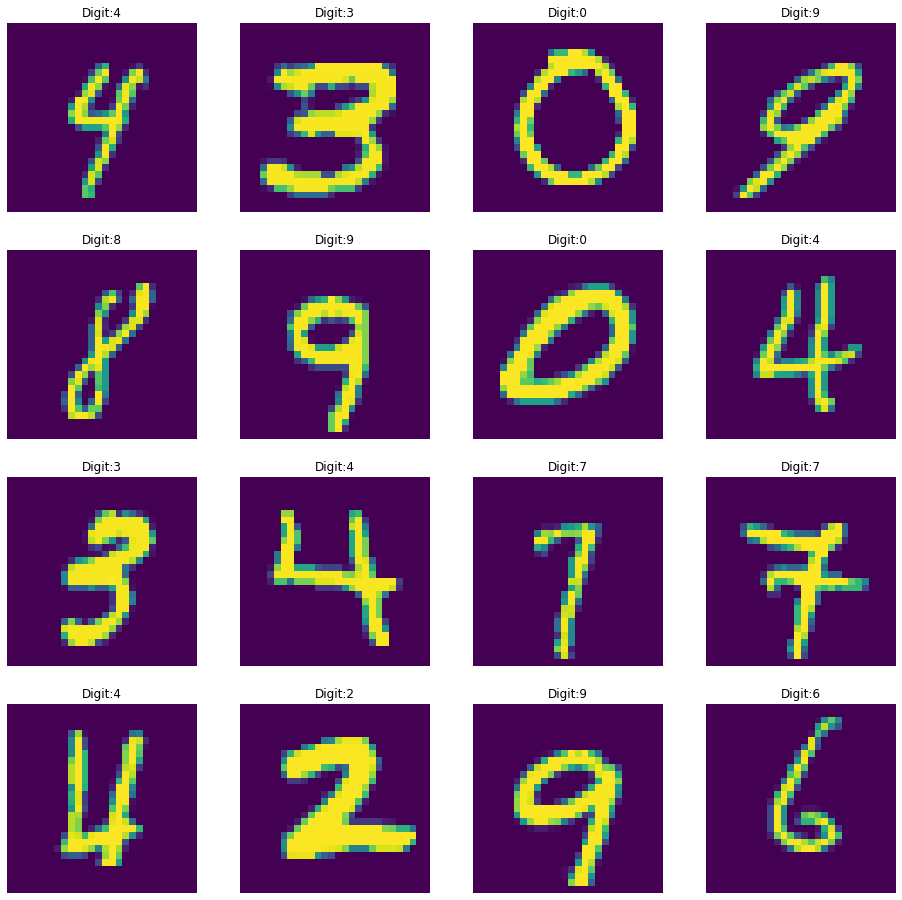

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 117us/step - loss: 0.2467 - accuracy: 0.9237 - val_loss: 0.1368 - val_accuracy: 0.9598
Epoch 2/5
54000/54000 [==============================] - 6s 111us/step - loss: 0.1110 - accuracy: 0.9658 - val_loss: 0.1222 - val_accuracy: 0.9653
Epoch 3/5
54000/54000 [==============================] - 6s 111us/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 0.1196 - val_accuracy: 0.9682
Epoch 4/5
54000/54000 [==============================] - 6s 112us/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.1089 - val_accuracy: 0.9723
Epoch 5/5
54000/54000 [==============================] - 6s 114us/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.1021 - val_accuracy: 0.9738


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.08788607495386386, 0.9750999808311462]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.2259102e-08, 8.8519400e-06, 7.6456473e-04, 5.4352693e-03,
        1.0851468e-07, 3.0957682e-07, 3.6653316e-10, 9.9364626e-01,
        1.5451136e-05, 1.2913547e-04]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[3.22591660e-08, 8.85194004e-06, 7.64564727e-04, 5.43526933e-03,
        1.08514683e-07, 3.09576819e-07, 3.66531749e-10, 9.93646264e-01,
        1.54511363e-05, 1.29135471e-04],
       [6.82882584e-10, 2.88805353e-08, 9.99999881e-01, 1.20368171e-07,
        7.18075244e-09, 1.51135260e-09, 5.91664850e-09, 2.47308241e-09,
        1.86138429e-08, 2.68054762e-11],
       [1.77261583e-08, 9.99908566e-01, 1.63739005e-05, 6.11925827e-07,
        2.67362993e-05, 2.51534721e-06, 4.04457342e-06, 2.36816722e-05,
        1.60720920e-05, 1.38297219e-06],
       [9.99633551e-01, 5.22104017e-07, 2.08353027e-04, 9.90220633e-06,
        3.91371532e-06, 6.47144680e-06, 3.94953240e-05, 1.67524722e-05,
        9.07112917e-06, 7.19823583e-05],
       [3.27903260e-09, 5.83017759e-08, 4.76658970e-05, 2.20822458e-10,
        9.99938488e-01, 3.54836338e-08, 6.33278842e-06, 2.43678301e-06,
        1.71115445e-07, 4.89255899e-06],
       [6.25732133e-10, 9.99959707e-01, 8.61470028e-07, 2.78078485e-08,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.2259102e-08, 8.8519400e-06, 7.6456473e-04, 5.4352693e-03,
        1.0851468e-07, 3.0957682e-07, 3.6653316e-10, 9.9364626e-01,
        1.5451136e-05, 1.2913547e-04]], dtype=float32)

In [25]:
history.history

{'accuracy': [0.92370373, 0.9658333, 0.9749445, 0.9800185, 0.9819074],
 'loss': [0.2467033656631355,
  0.11095017790815069,
  0.08174980317828832,
  0.06538155551339259,
  0.05774114421988122],
 'val_accuracy': [0.9598333239555359,
  0.9653333425521851,
  0.9681666493415833,
  0.9723333120346069,
  0.9738333225250244],
 'val_loss': [0.136809141750137,
  0.12224740229547024,
  0.11960819868619244,
  0.10891173463842521,
  0.10212686113035306]}

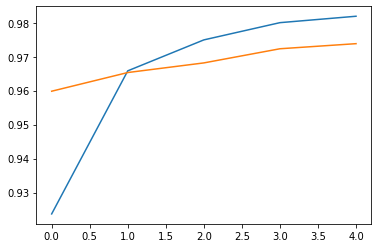

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 7s 128us/step - loss: 0.2629 - accuracy: 0.9204 - val_loss: 0.1474 - val_accuracy: 0.9575
Epoch 2/5
54000/54000 [==============================] - 7s 126us/step - loss: 0.1139 - accuracy: 0.9661 - val_loss: 0.0997 - val_accuracy: 0.9727
Epoch 3/5
54000/54000 [==============================] - 7s 123us/step - loss: 0.0817 - accuracy: 0.9741 - val_loss: 0.1113 - val_accuracy: 0.9713
Epoch 4/5
54000/54000 [==============================] - 7s 137us/step - loss: 0.0624 - accuracy: 0.9804 - val_loss: 0.1368 - val_accuracy: 0.9637
Epoch 5/5
54000/54000 [==============================] - 8s 140us/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0971 - val_accuracy: 0.9735


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 32us/step


[0.09359293412512634, 0.9746999740600586]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.2259102e-08, 8.8519400e-06, 7.6456473e-04, 5.4352693e-03,
        1.0851468e-07, 3.0957682e-07, 3.6653316e-10, 9.9364626e-01,
        1.5451136e-05, 1.2913547e-04]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[3.22591660e-08, 8.85194004e-06, 7.64564727e-04, 5.43526933e-03,
        1.08514683e-07, 3.09576819e-07, 3.66531749e-10, 9.93646264e-01,
        1.54511363e-05, 1.29135471e-04],
       [6.82882584e-10, 2.88805353e-08, 9.99999881e-01, 1.20368171e-07,
        7.18075244e-09, 1.51135260e-09, 5.91664850e-09, 2.47308241e-09,
        1.86138429e-08, 2.68054762e-11],
       [1.77261583e-08, 9.99908566e-01, 1.63739005e-05, 6.11925827e-07,
        2.67362993e-05, 2.51534721e-06, 4.04457342e-06, 2.36816722e-05,
        1.60720920e-05, 1.38297219e-06],
       [9.99633551e-01, 5.22104017e-07, 2.08353027e-04, 9.90220633e-06,
        3.91371532e-06, 6.47144680e-06, 3.94953240e-05, 1.67524722e-05,
        9.07112917e-06, 7.19823583e-05],
       [3.27903260e-09, 5.83017759e-08, 4.76658970e-05, 2.20822458e-10,
        9.99938488e-01, 3.54836338e-08, 6.33278842e-06, 2.43678301e-06,
        1.71115445e-07, 4.89255899e-06],
       [6.25732133e-10, 9.99959707e-01, 8.61470028e-07, 2.78078485e-08,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[3.2259102e-08, 8.8519400e-06, 7.6456473e-04, 5.4352693e-03,
        1.0851468e-07, 3.0957682e-07, 3.6653316e-10, 9.9364626e-01,
        1.5451136e-05, 1.2913547e-04]], dtype=float32)

In [36]:
history.history

{'accuracy': [0.9203889, 0.9660556, 0.97411114, 0.98044443, 0.9842963],
 'loss': [0.26291396456556737,
  0.11388422537705413,
  0.0817135482037233,
  0.062403061190723544,
  0.05204336403554771],
 'val_accuracy': [0.9574999809265137,
  0.9726666808128357,
  0.9713333249092102,
  0.9636666774749756,
  0.9735000133514404],
 'val_loss': [0.14743323778609435,
  0.09974984402457873,
  0.1112916003788511,
  0.13682572980225086,
  0.09714365731870445]}

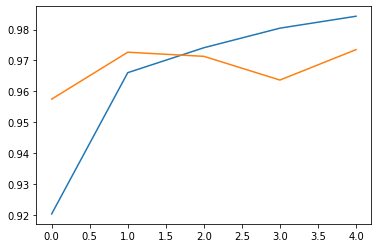

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])